# Handwritten Digit Recognition

In this mini-project we would train a neural network for the task of hand-written digit recognition, using the standard mnist dataset

<font size = "5"> Importing Packages </font>

In [65]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.model_selection import train_test_split

<font size = "5"> Dataset </font>

In [66]:
data = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = data.load_data()
print("Number of training examples:", x_train.shape[0])
print("Number of test examples:", x_test.shape[0])

Number of training examples: 60000
Number of test examples: 10000


Let us visualise some of the training images along with the given labels

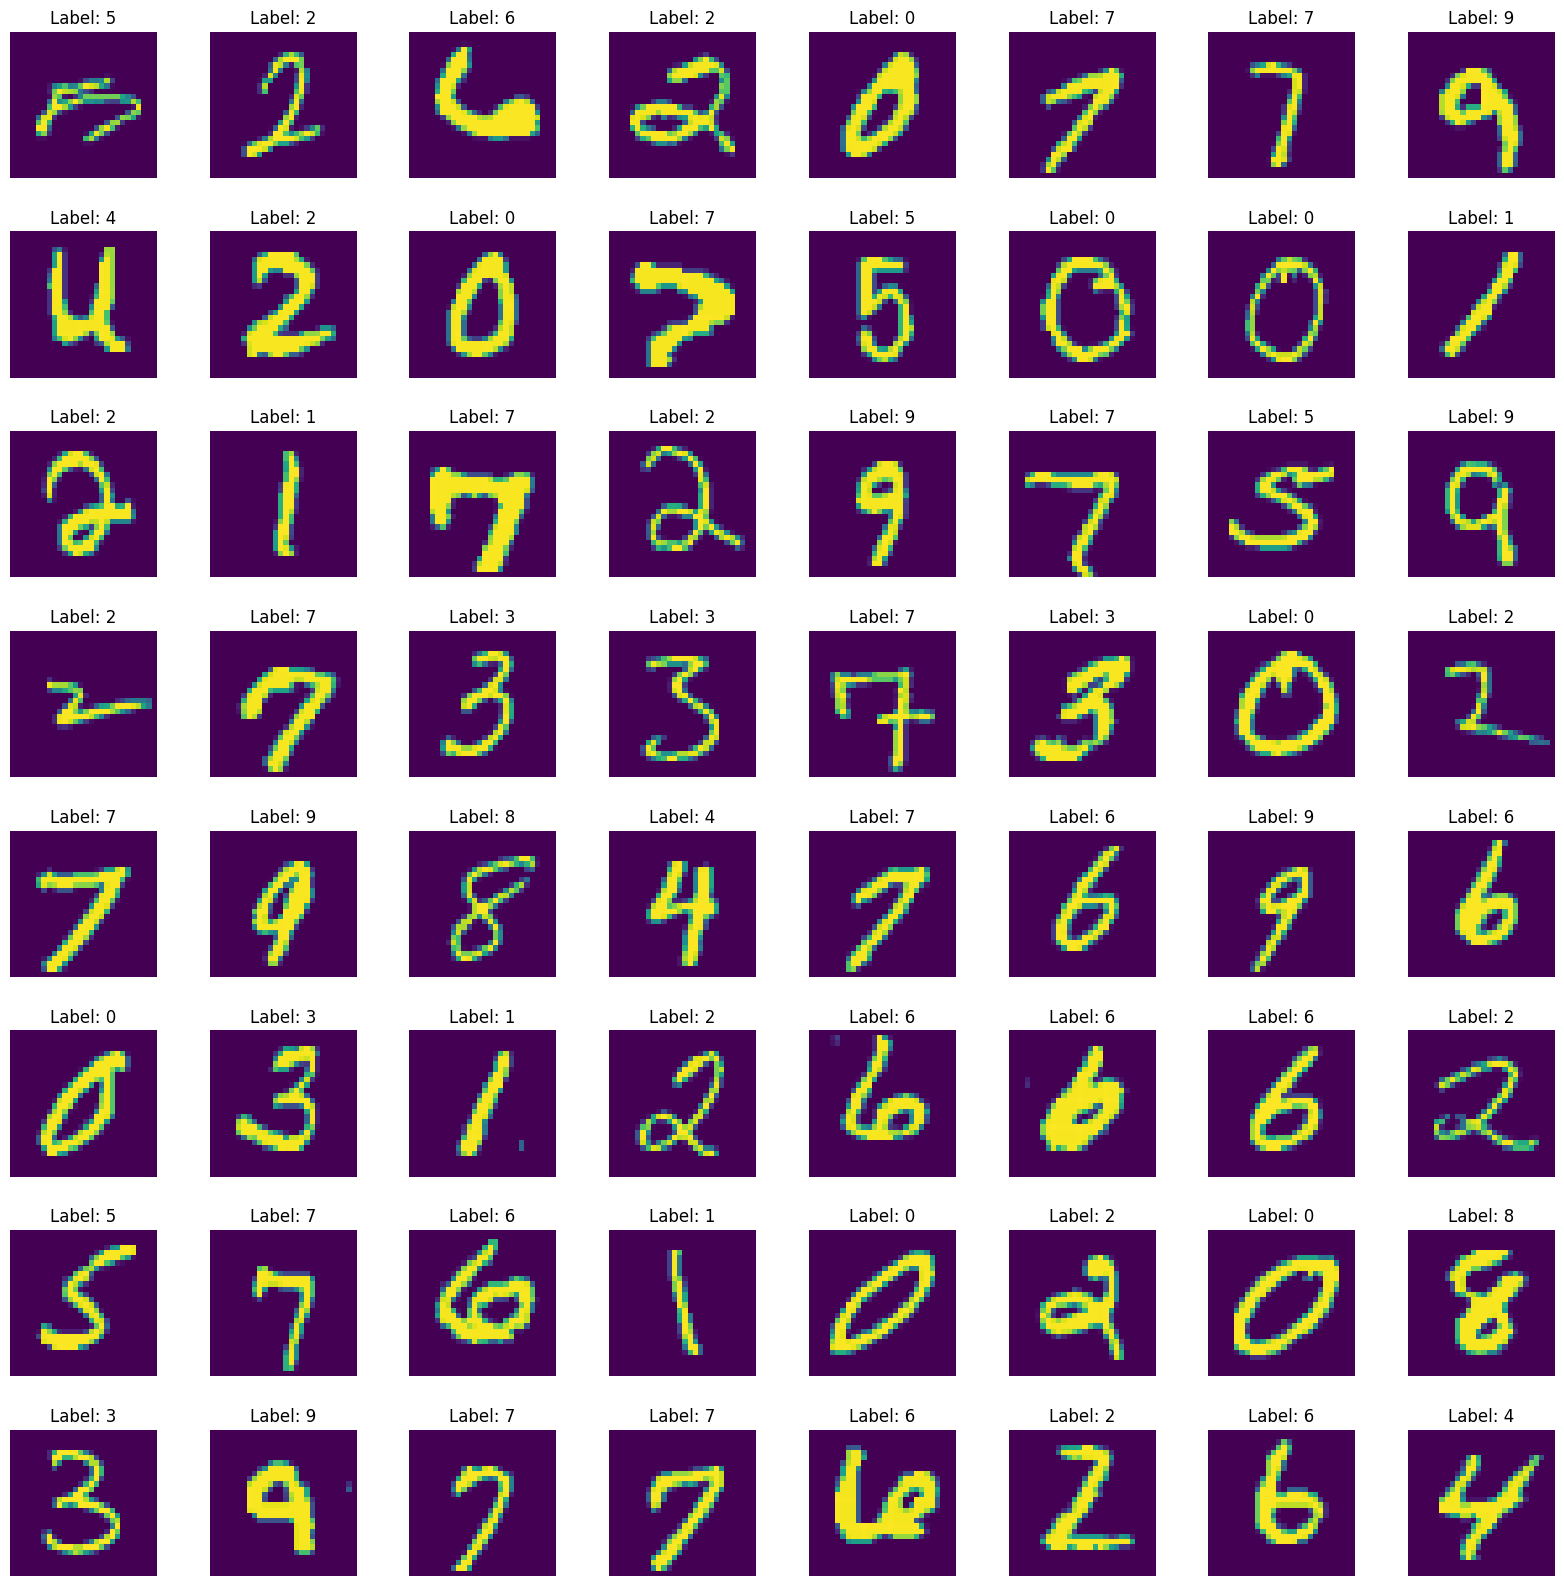

In [67]:
np.random.seed(100)
fig, axes = plt.subplots(8,8, figsize=(16,16))
fig.tight_layout(pad=0.15)
m = x_train.shape[0] 

for i,ax in enumerate(axes.flat):
    index = np.random.randint(m)
    ax.imshow(x_train[index])
    ax.set_title(f"Label: {y_train[index]}")
    ax.set_axis_off()

<font size = "5"> Building the neural network </font>

We would have three layers in the neural network: <br>
1. Layer 1 has 128 units with ReLU activation <br>
2. Layer 2 has 64 units with ReLU activation <br>
3. Layer 3 has 10 units (for the 10 digits) with softmax activation <br>

Each training example is an 28 x 28 image, we would have to reshape it to (784,) to feed it to the layer 1 of the neural networks.

In [68]:
tf.random.set_seed(100)
model = Sequential(
    [
        tf.keras.layers.InputLayer((784,)),
        tf.keras.layers.Dense(128, activation="relu", name="layer1"),
        tf.keras.layers.Dense(64, activation="relu", name="layer2"),
        tf.keras.layers.Dense(10, activation="softmax", name="layer3")
    ], name = "recognizer"
)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

Let us just cross-verify if the model made is what we desired for

In [69]:
model.summary()

Model: "recognizer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 layer2 (Dense)              (None, 64)                8256      
                                                                 
 layer3 (Dense)              (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


<font size = "5"> Training the Model </font>

- Now that the model is built , we specify the loss function and the optimiser to be used. <br>
- We use the Sparse Categorical Crossentropy loss function which is the ideal loss function for the multiclass classification problems <br>
- And finally we fit the model to the given dataset.

In [70]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
)

model.fit(
    x_train.reshape(m,784),y_train,
    epochs=50
)

Epoch 1/50
1875/1875 [==============================] - 9s 4ms/step - loss: 1.5079
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2903
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2038
Epoch 4/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1643
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1398
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1249
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1126
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1018
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0866
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0850
Epoch 11/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0780
Epoch 12/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0728

<font size = "5"> Testing the Model </font>

Let us now get the predictions of the model for the testing dataset and subsequently check how accuarte did the model turn out :)

In [71]:
n = x_test.shape[0]
predictions_vector = model.predict(x_test.reshape(n,784))
predictions = np.argmax(predictions_vector, axis = 1)

313/313 [==============================] - 1s 3ms/step


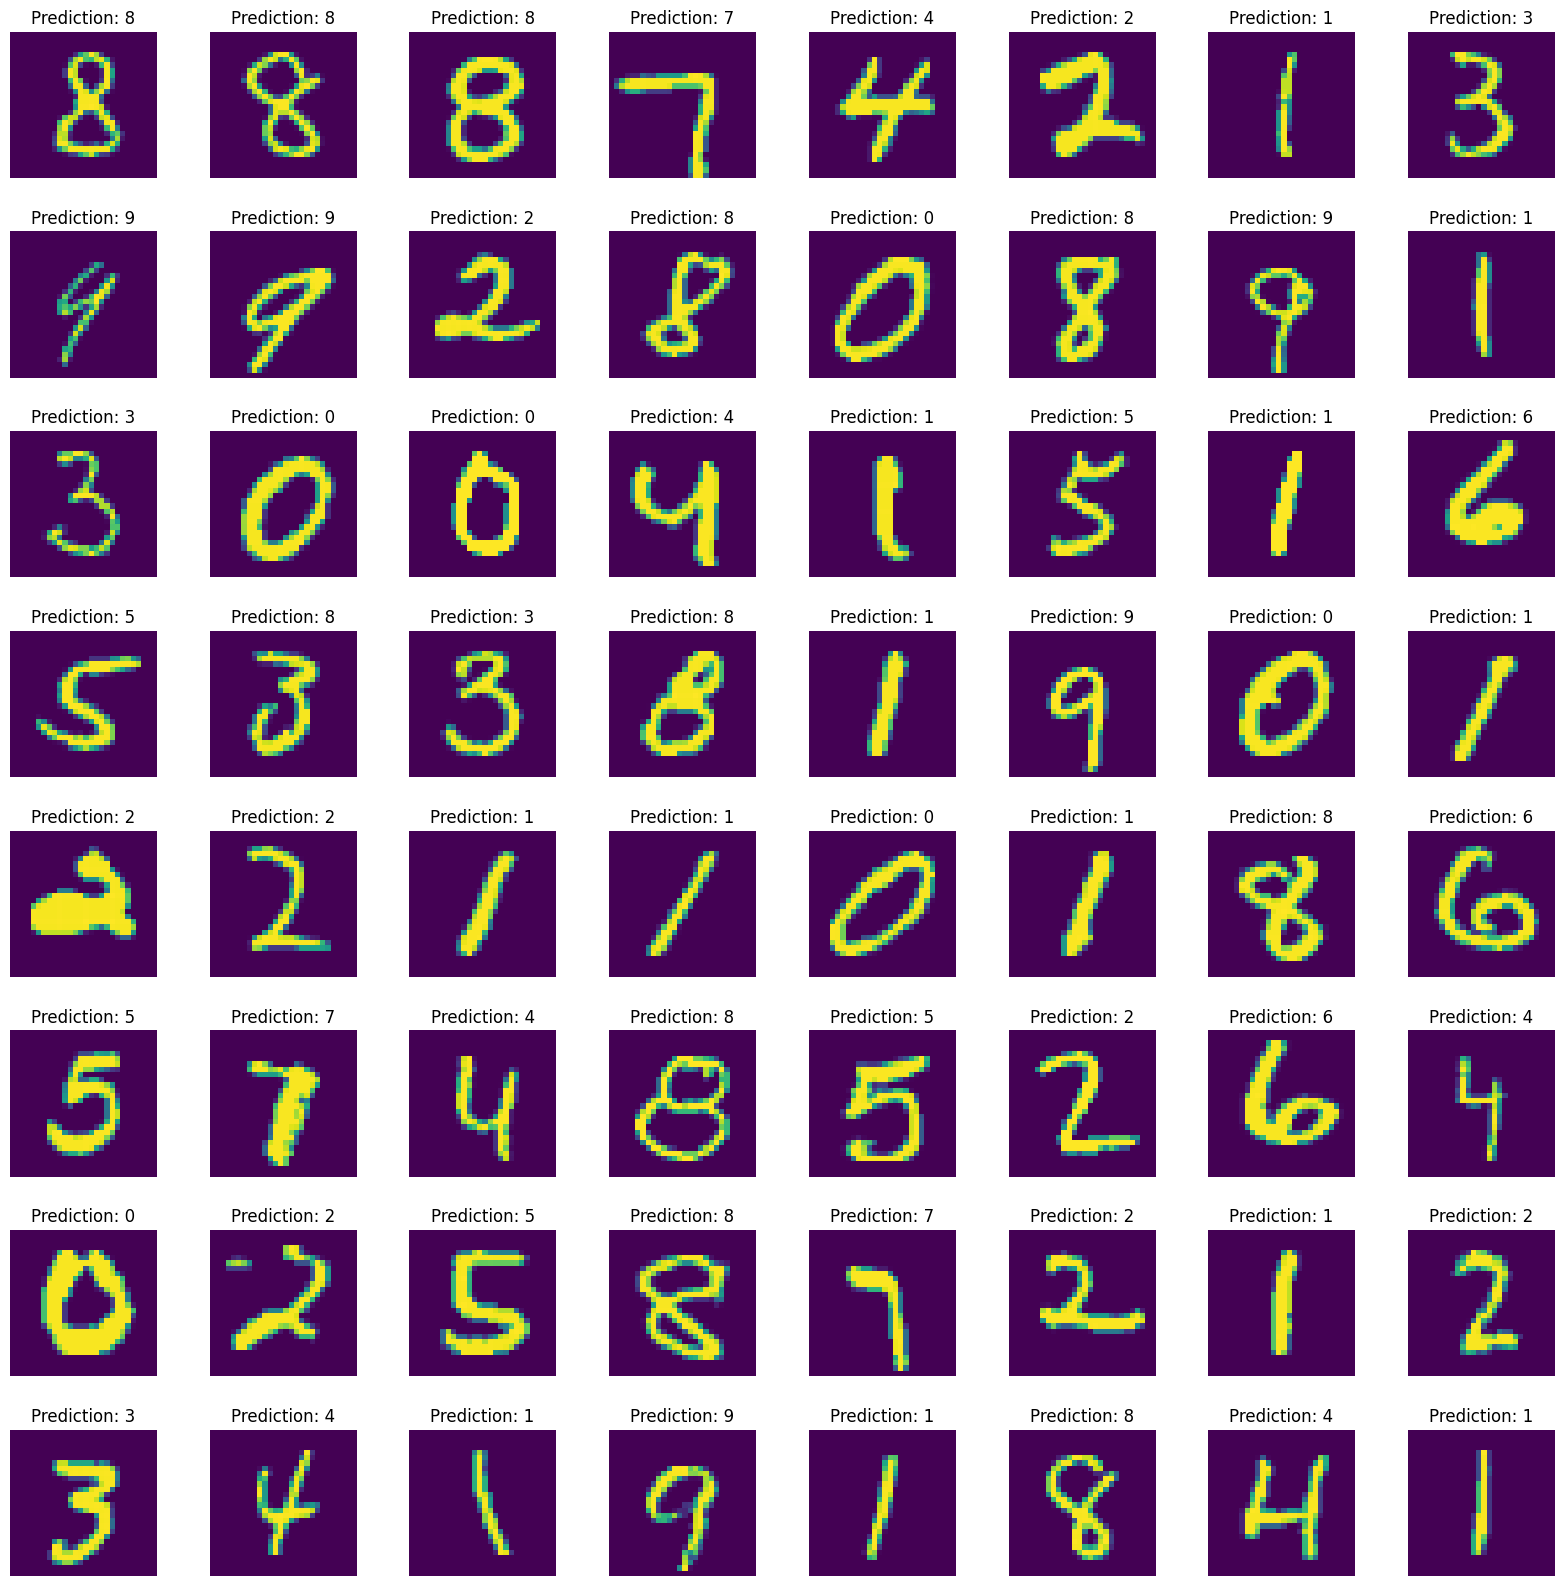

In [72]:
num_rows = 8
num_columns = 8

fig, ax = plt.subplots(num_rows, num_columns, figsize=(16,16))
fig.tight_layout(pad=0.15)
for i in range(num_rows):
    for j in range(num_columns):
        index = np.random.randint(n)
        ax[i,j].imshow(x_test[index])
        ax[i,j].set_title(f'Prediction: {predictions[index]}')
        ax[i,j].set_axis_off()    

Now that we are done with building the model and also visualised some of the images and their outputs , let us check how accurate is the model , by using the testing dataset 

In [73]:
correct_vec = (predictions==y_test)
correct = correct_vec.sum()
accuracy = correct*100/n
print(f"The accuracy of the model is {accuracy}%")

The accuracy of the model is 97.26%
